### Import all necesary libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os


### Import Set Of Images

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

## Import all necessary resources

In [38]:
img1 = cv2.imread('/home/yogesh/Desktop/CS/cloudArchitecture/resources/flam_cards/2.jpg') # queryImage

In [4]:

img2 = cv2.imread('/home/yogesh/Desktop/CS/cloudArchitecture/resources/flam_cards/0.jpg') # trainImage
database_images = load_images_from_folder("/home/yogesh/Desktop/CS/cloudArchitecture/resources/flam_cards")


# img1_SIFT = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img2_SIFT =cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


img1_SIFT = img1
img2_SIFT = img2


### Show Query Image

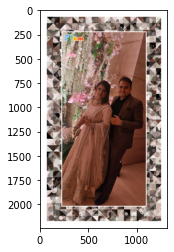

In [39]:
img_test = img1

img_test = cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB)
plt.imshow(img_test)

### Initialize the keyoint extractor

In [6]:
orb = cv2.ORB_create()
sift = cv2.SIFT_create()

### Initilizing the matcher (Brute Force Mtcher)

In [23]:
bf = cv2.BFMatcher()
FLANN_matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)

## Matching  images

####  Select Algoritm and matcher

In [24]:
matching_methods = ["BF_matcher","FLANN_matcher"]

In [25]:
feature_extractions = ["ORB", "SIFT"]


In [26]:
matcher_selection = int(input())

0


In [27]:
feature_selection = int(input())

0


In [28]:
print(matching_methods[matcher_selection])
print(feature_extractions[feature_selection])

BF_matcher
ORB


### Computing keypoints of database

In [29]:
kps_database =[]
des_database = []
kps_temp= None
des_temp =None
i=0
for imgi in database_images:
    if feature_selection == 0:
        kps_temp,des_temp = orb.detectAndCompute(imgi,None)
    elif feature_selection ==1 :
        kps_temp,des_temp = sift.detectAndCompute(imgi,None)
    kps_database.append(kps_temp)
    des_database.append(des_temp)
    

In [30]:
print(len(kps_database))

144


### Computing keypoints 

In [40]:
kp1_orb, des1_orb = orb.detectAndCompute(img1,None)
kp2_orb, des2_orb = orb.detectAndCompute(img2,None)

### computing keypoints for all images in data base

In [41]:
kp1_SIFT, des1_SIFT = sift.detectAndCompute(img1_SIFT,None)
kp2_SIFT, des2_SIFT = sift.detectAndCompute(img2_SIFT,None)

In [42]:
feature_detection = [[des1_orb,des2_orb],[des1_SIFT,des2_SIFT]]
feature_keypoints = [[kp1_orb,kp2_orb],[kp1_SIFT,kp2_SIFT]]

### Matching Start

In [45]:
matches = []
matches_temp =None

for descriptors in des_database:
    if(matcher_selection ==0):
        matches_temp = bf.knnMatch(feature_detection[feature_selection][0],descriptors, k=2)

    elif(matcher_selection == 1):
        matches_temp = FLANN_matcher.knnMatch(feature_detection[feature_selection][0],descriptors, 2)
    matches.append(matches_temp)



In [46]:
goods =[]

for mat in matches:
    good = []
    for m, n in mat:
        if m.distance < 0.75 * n.distance:
            good.append(m)
    goods.append(len(good))

print(len(goods))
print(goods)

144
[29, 39, 37, 20, 38, 32, 37, 36, 39, 20, 28, 31, 27, 30, 24, 24, 15, 27, 30, 33, 30, 25, 42, 38, 35, 33, 21, 27, 26, 39, 16, 22, 26, 21, 24, 21, 39, 19, 23, 22, 30, 40, 30, 39, 29, 26, 36, 29, 37, 25, 30, 40, 36, 35, 27, 29, 25, 27, 26, 30, 27, 30, 38, 31, 27, 16, 25, 23, 24, 27, 38, 29, 23, 36, 32, 23, 21, 45, 22, 23, 21, 30, 31, 34, 23, 16, 19, 34, 16, 32, 28, 14, 35, 34, 30, 30, 30, 39, 32, 30, 21, 17, 32, 18, 31, 36, 500, 25, 32, 29, 39, 20, 26, 30, 18, 22, 19, 28, 36, 30, 23, 20, 26, 27, 37, 31, 24, 20, 34, 27, 26, 22, 30, 33, 27, 24, 28, 28, 20, 30, 26, 28, 14, 44]


In [47]:
max_value = max(goods)

max_index= goods.index(max_value)


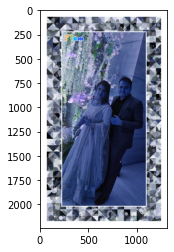

In [48]:
plt.imshow(database_images[max_index])

### Draw Matches

In [21]:
imgFeatures = cv2.drawMatches(img1,feature_keypoints[feature_selection][0] , img2, feature_keypoints[feature_selection][1], good, None, flags=2)

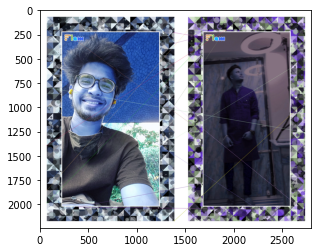

In [22]:
plt.imshow(imgFeatures)